#Saman Aijaz Siddiqui (B21BB027)

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [3]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 06:20:19--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip’

bike+sharing+datase     [  <=>               ] 273.43K  1.08MB/s    in 0.2s    

2024-08-27 06:20:20 (1.08 MB/s) - ‘bike+sharing+dataset.zip’ saved [279992]

Archive:  bike+sharing+dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

In [7]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)
# Separating features and target variable
X = df.drop(columns=['cnt']) # Features
y = df['cnt'] # Target

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
# Numerical features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')), # Impute missing values with mean
('scaler', MinMaxScaler()) # Normalize using MinMaxScaler
])
# Transforming above
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])
# Categorical features
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

In [9]:
# Transforming categorical features
X_encoded = categorical_pipeline.fit_transform(X[categorical_features])

# Converting it to a dataframe
X_encoded = pd.DataFrame(
    X_encoded,
    columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features)
)

# Combine encoded categorical features with numerical features
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

# Split the data (20:80 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<Axes: >

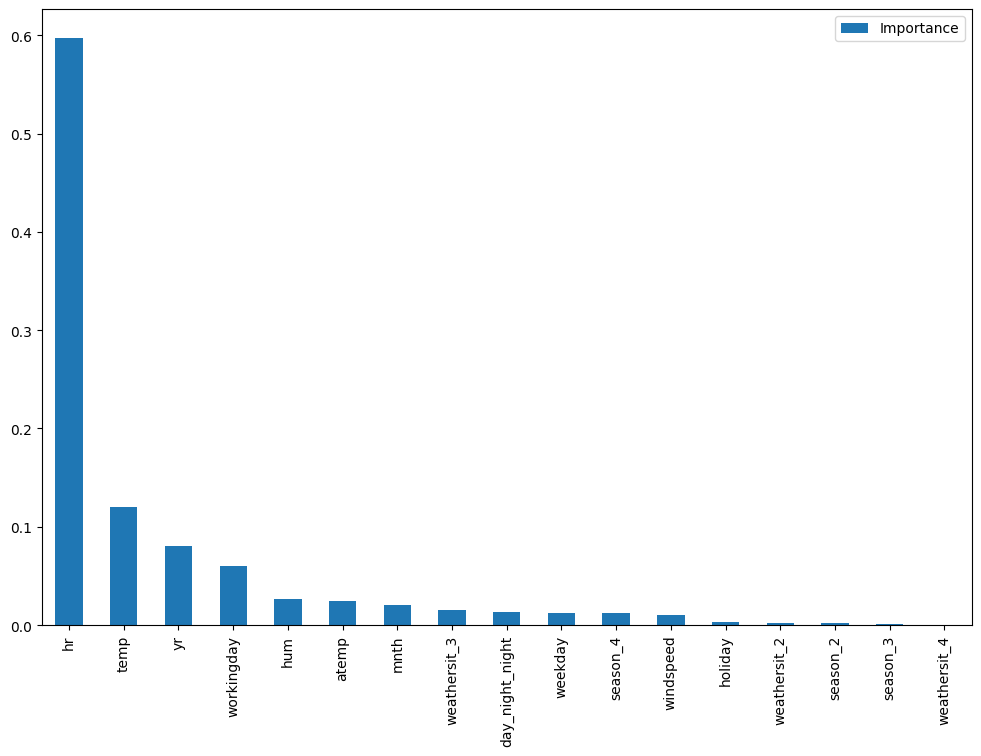

In [11]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plotting each feature importance
feat_importances.plot(kind='bar', figsize=(12,8))

In [12]:
# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1808.4074990292243
R-squared: 0.9428901308176855


In [13]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the final pipeline
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Configure pipeline display to 'diagram'
set_config(display='diagram')

# Display the pipeline
final_pipeline


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

#Assignment 02

1) Create Interaction Features:

I have created interaction features between numerical variables. This can help the model capture relationships that might not be evident from individual features alone. For example, the product of temp (temperature) and hum (humidity) could capture the effect of humid heat on bike rentals.

In [14]:
# Creating interaction features
df['temp_hum'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']

 **temp * hum**: High temperature combined with high humidity might deter bike rentals more significantly than each factor alone.
 **temp*windspeed**: On windy days, higher temperatures might not feel as hot, potentially affecting bike rental behavior differently compared to still air.

In [27]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night,temp_hum,temp_windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night,0.1944,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night,0.1760,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night,0.1760,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night,0.1800,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night,0.1800,0.0


<Axes: >

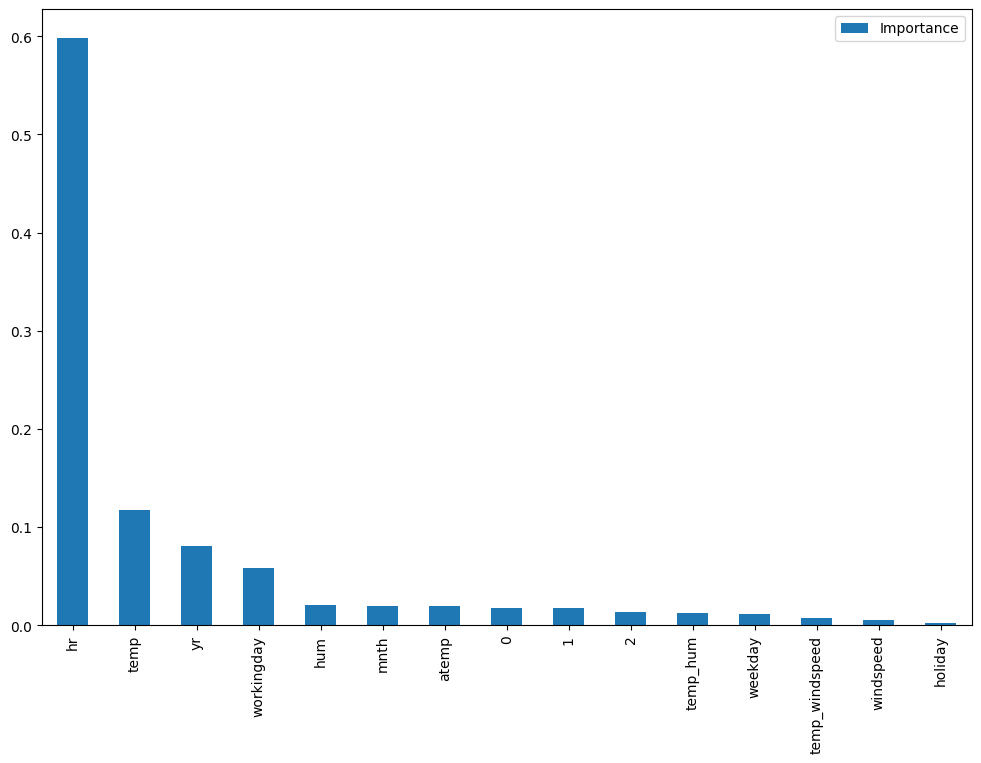

In [28]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plotting each feature importance
feat_importances.plot(kind='bar', figsize=(12,8))

In [15]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


Impact Evaluation: After implementing TargetEncoder, model compares
performance (MSE and R²) to the previous model that used OneHotEncoder.

a) training a LinearRegressor using both Scikit-Learn and from scratch.

In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already loaded and cleaned as per your earlier steps
# Check for the presence of necessary columns before proceeding
categorical_features = ['season', 'weathersit', 'day_night']
missing_features = [feature for feature in categorical_features if feature not in df.columns]

if missing_features:
    raise ValueError(f"The following necessary columns are missing in DataFrame: {missing_features}")

# Ensure the target and other necessary columns are in the DataFrame
X = df.drop(columns=['cnt'])  # Drop the target column
y = df['cnt']  # Define the target variable

# Target encoding categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', TargetEncoder())
])

# Apply the pipeline to categorical features
X_encoded = categorical_pipeline.fit_transform(X[categorical_features], y)

# Combine encoded categorical features with remaining numerical features
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

# Convert all column names to strings to avoid sklearn TypeError
X.columns = X.columns.astype(str)

# Check if the concatenation resulted in expected number of features
print(f"Number of features after encoding: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Number of features after encoding: 15
Mean Squared Error: 1776.7196810182302
R-squared: 0.9438908384249323


b. Training Linear Regression from Scratch: Here is a simple implementation of Linear Regression from scratch using the Normal Equation method:

In [17]:
import numpy as np

# Add intercept column to X_train and X_test
X_train_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Normal Equation: theta = (X'X)^(-1)X'y
theta_best = np.linalg.inv(X_train_intercept.T.dot(X_train_intercept)).dot(X_train_intercept.T).dot(y_train)

# Predict using the theta obtained
y_pred_scratch = X_test_intercept.dot(theta_best)

# Evaluate model
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)
print(f'Linear Regression MSE (From Scratch): {mse_scratch}')
print(f'Linear Regression R-squared (From Scratch): {r2_scratch}')


Linear Regression MSE (From Scratch): 14974.133860641261
Linear Regression R-squared (From Scratch): 0.5271138687719688


**We observe that the R-squared value of the scratch model is lower.**

#Pipeline

In [18]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.5/545.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138

In [19]:
import mlflow
import mlflow.sklearn

# Start MLflow experiment
mlflow.start_run()

# Log model parameters and metrics
mlflow.log_param("model", "RandomForestRegressor")
mlflow.log_param("n_estimators", 100)
mlflow.log_param("random_state", 42)
mlflow.log_metric("mse", mse)
mlflow.log_metric("r2", r2)

# Log the model
mlflow.sklearn.log_model(model, "RandomForestRegressorModel")

# End MLflow experiment
mlflow.end_run()


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/27 06:21:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [20]:
pip install graphviz

In [21]:
import mlflow
import mlflow.sklearn
from graphviz import Digraph
from sklearn import set_config

# Start MLflow experiment
mlflow.start_run()

# Log model parameters and metrics
mlflow.log_param("model", "RandomForestRegressor")
mlflow.log_param("n_estimators", 100)
mlflow.log_param("random_state", 42)
mlflow.log_metric("mse", mse)
mlflow.log_metric("r2", r2)

# Log the model
mlflow.sklearn.log_model(model, "RandomForestRegressorModel")

# Create a depiction of the pipeline
def visualize_pipeline():
    dot = Digraph(comment='Pipeline')
    dot.node('A', 'Data Preprocessing')
    dot.node('B', 'Target Encoding')
    dot.node('C', 'RandomForestRegressor')
    dot.edges(['AB', 'BC'])
    return dot

pipeline_graph = visualize_pipeline()

# Save the pipeline depiction
pipeline_graph.render('pipeline_graph', format='png')

# Log pipeline depiction as an artifact
mlflow.log_artifact('pipeline_graph.png')

# End MLflow experiment
mlflow.end_run()

2024/08/27 06:21:58 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [23]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Assuming numerical_pipeline and categorical_pipeline are already defined
# Define the final pipeline
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', categorical_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Configure pipeline display to 'diagram'
set_config(display='diagram')

# Display the pipeline
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('target', TargetEncoder(cols=[0, 1, 2]))])),
                ('model', RandomForestRegressor(random_state=42))])

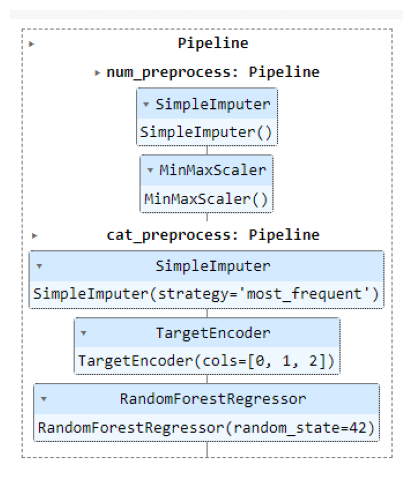

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the specified path
img = mpimg.imread('/content/pipeline_SS_2.png')

# Display the image
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')  # Hide axis to focus on the image
plt.show()

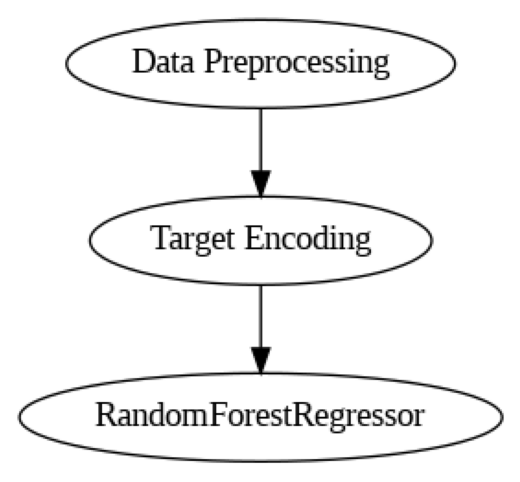

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the specified path
img = mpimg.imread('/content/pipeline_graph.png')

# Display the image
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')  # Hide axis to focus on the image
plt.show()